# Housing Market Analysis
### Juan Rodriguez

# Index <a class="anchor" id="Index"><a/>


* [1. Introduction](#Introduction)
* [2. The Data](#The-Data) 
   * [2.1 Import the Data](#Import-the-Data)
   *[2.2 Data Exploration](#Data-Exploration)
   *[2.3 Data Preparation](#Data-Preparation)
   *[2.4 Correlation](#Correlation)
*[3. Project Description](#Project-Description)
   * [3.1 Analysis](#Analysis)
   * [3.2 Results](#Results)
   * [3.3 Verify against test data](#Verify-against-test-data)
*[4. Conclusion](#Conclusion)
*[5. References](#References)
   

# Introduction <a class="anchor" id="Introduction"><a/> 
The purpose of this project is to determine which variables of data in a house are most correlated to it's price. If I find good correlation using training data, I will be able to accurately predict the price of a house based on data points and determine whether a house is undervalued or overvalued. I will begin with analysing the data to better understand which variables could potentially have more correlation than others, and I will clean the data so that it is all useful if need be. Then I will perform a simple numeric correlation function on the data so that it gives me the top correlated variables to sale price. Finally, using the library linear_model, I will build a linear regression model using a certain number of variables. From here, I will be able to test the model and plot it to better visualize the results.

[Back To Top](#Index)

## The Data <a class="anchor" id="The-Data"><a/> 

### 2.1 Import the Data <a class="anchor" id="Import-the-Data"><a/> 

In [3]:
import pandas as pd
import numpy as np
import matplotlib as matplotlib
from matplotlib import pyplot as plt
from sklearn import linear_model

In [4]:
df1 = pd.read_csv('HouseSmallData.csv')
df1

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In the code above, I imported all the necessary libraries for this project and I have loaded the raw data into a variable

[Back To Top](#Index)

### 2.2 Data Exploration <a class="anchor" id="Data-Exploration"><a/> 

In [86]:
y = df1['SalePrice']
x1 = df1['OverallQual']
x2 = df1['OverallCond']
x3 = df1['BldgType']
x4 = df1['Neighborhood']
x6 = df1['TotRmsAbvGrd']
x7 = df1['GrLivArea']
x8 = df1['FullBath']
x9 = df1['KitchenQual']
x10 = df1['MasVnrArea']

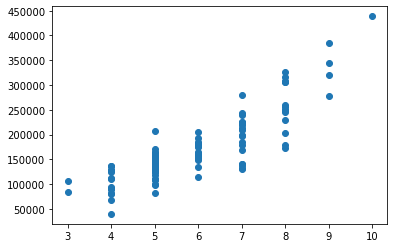

In [87]:
OverallQualPlt = plt.scatter(x1,y)

For this variable, there is clearly correlation between overall quality and saleprice

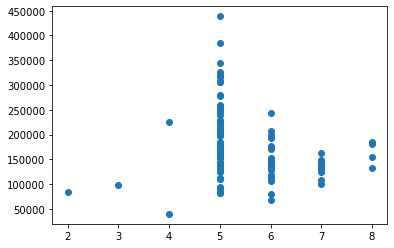

In [88]:
OverallCondPlt = plt.scatter(x2,y)

There seems to be weak correlation between overall condition and saleprice

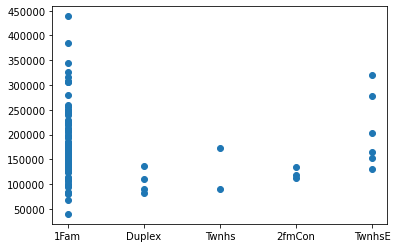

In [89]:
BldgTypedf = df1[['BldgType','SalePrice']].sort_values(['SalePrice'])
BldgTypeplt = plt.scatter(BldgTypedf['BldgType'],BldgTypedf['SalePrice'])

There seems to be a little correlation between building type and saleprice

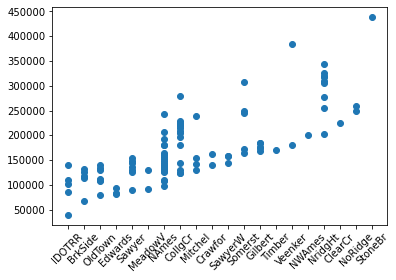

In [90]:
Neighborhooddf = df1[['Neighborhood','SalePrice']].sort_values(['SalePrice'])
# Neighborhoodplt = plt.scatter(Neighborhooddf['Neighborhood'],BldgTypedf['SalePrice'])
axs = plt.subplot()
axs.scatter(Neighborhooddf['Neighborhood'],Neighborhooddf['SalePrice'])
axs.tick_params(axis='x',labelrotation=45)
# axs.set_xticklabels(axs.get_xticks(), rotation=90)

There is definetly correlation between neighborhood and sale price

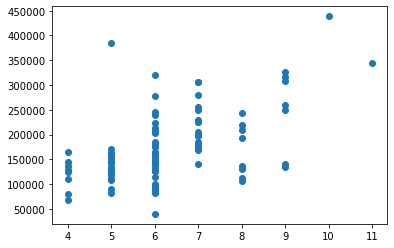

In [91]:
TotRmsAbvGrdPlt = plt.scatter(x6,y)

Positive correlation between total rooms above ground and sale price

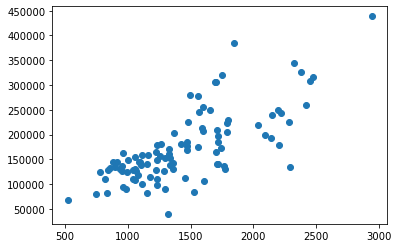

In [92]:
GrLivAreaPlt = plt.scatter(x7,y)

Positive correlation between living area above grouns in sqr feet and sale price

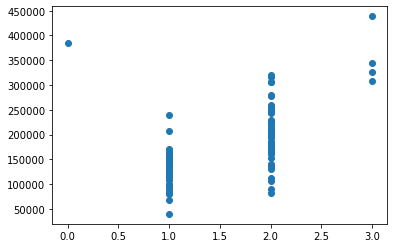

In [93]:
FullBathPlt = plt.scatter(x8,y)

Positive correlation between number of full baths and sale price 

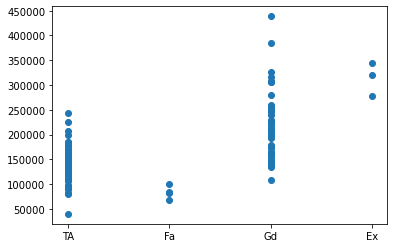

In [94]:
KitchenQualdf = df1[['KitchenQual','SalePrice']].sort_values(['SalePrice'])
KitchenQualplt = plt.scatter(KitchenQualdf['KitchenQual'],BldgTypedf['SalePrice'])

Some postivie correlation between kitchen quality and sales price

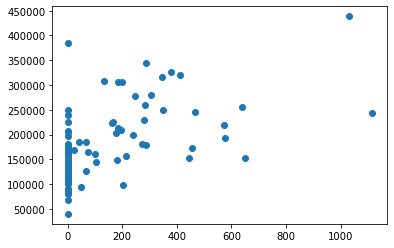

In [95]:
MasVnrArea = plt.scatter(x10, y)

Not very strong correlation between MasVnrArea and Sales price

[Back To Top](#Index)

### 2.3 Data Preparation <a class="anchor" id="Data-Preparation"><a/> 

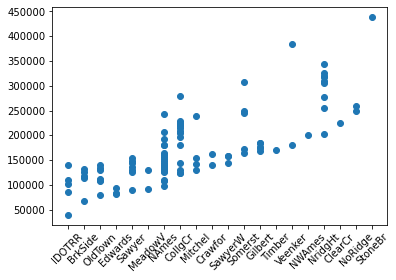

In [96]:
Neighborhooddf = df1[['Neighborhood','SalePrice']].sort_values(['SalePrice'])
# Neighborhoodplt = plt.scatter(Neighborhooddf['Neighborhood'],BldgTypedf['SalePrice'])
axs = plt.subplot()
axs.scatter(Neighborhooddf['Neighborhood'],Neighborhooddf['SalePrice'])
axs.tick_params(axis='x',labelrotation=45)
# axs.set_xticklabels(axs.get_xticks(), rotation=90)

In [98]:
df2 = df1
trainDF = df2[['SalePrice','OverallQual','OverallCond','BldgType','Neighborhood','TotRmsAbvGrd','GrLivArea','FullBath','KitchenQual']].sort_values('SalePrice')
trainDF.loc[trainDF['BldgType'] == '1Fam', 'BldgType'] = 1
trainDF.loc[trainDF['BldgType'] == 'Duplex', 'BldgType'] = 2
trainDF.loc[trainDF['BldgType'] == 'Twnhs', 'BldgType'] = 3
trainDF.loc[trainDF['BldgType'] == '2fmCon', 'BldgType'] = 4
trainDF.loc[trainDF['BldgType'] == 'TwnhsE', 'BldgType'] = 5

trainDF['BldgType'] = np.int64(trainDF['BldgType'])

trainDF.loc[trainDF['KitchenQual'] == 'Po', 'KitchenQual'] = 0
trainDF.loc[trainDF['KitchenQual'] == 'TA', 'KitchenQual'] = 1
trainDF.loc[trainDF['KitchenQual'] == 'Fa', 'KitchenQual'] = 2
trainDF.loc[trainDF['KitchenQual'] == 'Gd', 'KitchenQual'] = 3
trainDF.loc[trainDF['KitchenQual'] == 'Ex', 'KitchenQual'] = 4

trainDF['KitchenQual'] = np.int64(trainDF['KitchenQual'])


trainDF.loc[trainDF['Neighborhood'] == 'Edwards', 'Neighborhood'] = 1
trainDF.loc[trainDF['Neighborhood'] == 'NPkVill', 'Neighborhood'] = 2
trainDF.loc[trainDF['Neighborhood'] == 'IDOTRR', 'Neighborhood'] = 3
trainDF.loc[trainDF['Neighborhood'] == 'BrkSide', 'Neighborhood'] = 4
trainDF.loc[trainDF['Neighborhood'] == 'OldTown', 'Neighborhood'] = 5
trainDF.loc[trainDF['Neighborhood'] == 'Edwards', 'Neighborhood'] = 6
trainDF.loc[trainDF['Neighborhood'] == 'Sawyer', 'Neighborhood'] = 7
trainDF.loc[trainDF['Neighborhood'] == 'MeadowV', 'Neighborhood'] = 8
trainDF.loc[trainDF['Neighborhood'] == 'NAmes', 'Neighborhood'] = 9
trainDF.loc[trainDF['Neighborhood'] == 'CollgCr', 'Neighborhood'] = 10
trainDF.loc[trainDF['Neighborhood'] == 'Mitchel', 'Neighborhood'] = 11
trainDF.loc[trainDF['Neighborhood'] == 'Crawfor', 'Neighborhood'] = 12
trainDF.loc[trainDF['Neighborhood'] == 'SawyerW', 'Neighborhood'] = 13
trainDF.loc[trainDF['Neighborhood'] == 'Somerst', 'Neighborhood'] = 14
trainDF.loc[trainDF['Neighborhood'] == 'Gilbert', 'Neighborhood'] = 15
trainDF.loc[trainDF['Neighborhood'] == 'Timber', 'Neighborhood'] = 16
trainDF.loc[trainDF['Neighborhood'] == 'Veenker', 'Neighborhood'] = 17
trainDF.loc[trainDF['Neighborhood'] == 'NWAmes', 'Neighborhood'] = 18
trainDF.loc[trainDF['Neighborhood'] == 'NridgHt', 'Neighborhood'] = 19
trainDF.loc[trainDF['Neighborhood'] == 'ClearCr', 'Neighborhood'] = 20
trainDF.loc[trainDF['Neighborhood'] == 'NoRidge', 'Neighborhood'] = 21
trainDF.loc[trainDF['Neighborhood'] == 'StoneBr', 'Neighborhood'] = 22
trainDF.loc[trainDF['Neighborhood'] == 'Blmngtn', 'Neighborhood'] = 23
trainDF.loc[trainDF['Neighborhood'] == 'Blueste', 'Neighborhood'] = 24
trainDF.loc[trainDF['Neighborhood'] == 'BrDale', 'Neighborhood'] = 25


trainDF['Neighborhood'] = np.int64(trainDF['Neighborhood'])

trainDF



,SalePrice,OverallQual,OverallCond,BldgType,Neighborhood,TotRmsAbvGrd,GrLivArea,FullBath,KitchenQual
30,40000,4,4,1,3,6,1317,1,1
29,68500,4,6,1,4,4,520,1,2
68,80000,4,6,1,5,4,747,1,1
39,82000,4,5,2,1,6,1152,2,2
98,83000,5,5,1,1,5,835,1,1
...,...,...,...,...,...,...,...,...,...
45,319900,9,5,5,19,6,1752,2,4
20,325300,8,5,1,19,9,2376,3,3
11,345000,9,5,1,19,11,2324,3,4
53,385000,9,5,1,17,5,1842,0,3


There are no missing values in the data that I chose to use to train my model. When I was analysing the graphs however, I wanted to use variables that weren't numeric in order to predict housing price. In order to do this I had to create a seperate dataframe to sort the values of one non-numeric variable based on the sale price. After this step, when I went to plot the scatter plot I was able to tell whether there was correlation. Finally, for the variables that I saw correlation in, I changed their data type to numeric so that I can apply the 'corr' function to them. For example, using neighborhood data, I first just plotted it without sorting the values and it was very hard to tell whether there was correlation as there was no linear regression between X and Y. When I sorted the values of neighborhood based on sale price however, it was clear that there was strong correlation between X and Y, then I changed each neighborhood to a number according to what saleprice they are correlated most with, for the neighborhoods that were not in the dataset, I added them at random in the model knowing that in the future, if I get data from those neighborhoods, I will add them according do their sale price as a rank. The steps I took to reshape the data are given in data exploration as I had to clean the data in order to explore it. I did create a new dataframe with all of the variables I decided to use from the exploration stage and sorted it by SalesPrice so that it is more organized and easier to analyze.

[Back To Top](#Index)

### 2.4 Correlation <a class="anchor" id="Correlation"><a/> 

In [99]:
corr = trainDF.corr()
corr

,SalePrice,OverallQual,OverallCond,BldgType,Neighborhood,TotRmsAbvGrd,GrLivArea,FullBath,KitchenQual
SalePrice,1.000000,0.855061,-0.170443,-0.012190,0.780883,0.553603,0.735129,0.579505,0.622146
OverallQual,0.855061,1.000000,-0.154939,0.077427,0.688240,0.550755,0.673248,0.600099,0.623737
OverallCond,-0.170443,-0.154939,1.000000,-0.061342,-0.131437,-0.257731,-0.362534,-0.242930,-0.186308
BldgType,-0.012190,0.077427,-0.061342,1.000000,0.066679,-0.065545,-0.024872,0.150591,0.076835
Neighborhood,0.780883,0.688240,-0.131437,0.066679,1.000000,0.360740,0.567601,0.503868,0.473238
TotRmsAbvGrd,0.553603,0.550755,-0.257731,-0.065545,0.360740,1.000000,0.831927,0.741525,0.340136
GrLivArea,0.735129,0.673248,-0.362534,-0.024872,0.567601,0.831927,1.000000,0.707629,0.409340
FullBath,0.579505,0.600099,-0.242930,0.150591,0.503868,0.741525,0.707629,1.000000,0.377177
KitchenQual,0.622146,0.623737,-0.186308,0.076835,0.473238,0.340136,0.409340,0.377177,1.000000


Based on the results in the correlation DF above, I will remove the variables OverallCond and BldgType as they have no positive correlation with SalePrice. Moving on, I will apply all the other variables to the linear_model function to create an effective model in determining sale price of a house.

[Back To Top](#Index)

## Project Description<a class="anchor" id="Project-Description"><a/> 

### 3.1 Linear Regression <a class="anchor" id="Linear Regression"><a/> 

The algorithm I used in this project functions to determine which data points of a house correlate most with the rise in sale price of that same house. Firstly, by cleaning the data, it sets all variables as the same data types so that we can easily compare which has the most weight in determining the price of a house. It also sorts the variables by SalePrice so the user can see with more clarity  which values of each variable are better for the sale of a house. 

Linear regression is a fundamental statistical method used for modeling the relationship between a dependent variable (Y) and one or more independent variables (X). It assumes a linear relationship between these variables, meaning that Y can be expressed as a linear combination of X. The origin of linear regression dates back to the early 19th century, with the method being formalized by Francis Galton in the late 19th century.

Formulas:

Simple Linear Regression : y = m(x) + b

Multiple Linear Regression: y = m1x1 + m2x2 +m3x3... mnxn + b

The necessary steps to implement this algorithm in python are to load the data, determine which variables you want to use by getting a glimpse by plotting each of them against sale price. Clean the data and determine which variables are useful for the algorithm. Get rid of the variables that have little to no correlation with sale price, and then implement linear_model functions to get an R score which will determine how successful your model is in determining the sale price of a house. Then test the function against new data and compare.


[Back To Top](#Index)

### 3.2 Analysis <a class="anchor" id="Analysis"><a/> 

In [100]:
# First group of variables:
x1 = trainDF[['Neighborhood','OverallQual','GrLivArea','KitchenQual','FullBath','TotRmsAbvGrd']]
#Second group of variables:
x2 = trainDF[['KitchenQual','Neighborhood', 'TotRmsAbvGrd','FullBath']]
#Third group of variables:
x3 = trainDF[['FullBath','Neighborhood','OverallQual']]
#Set dependent variable equal to y:
y = trainDF['SalePrice']

lr = linear_model.LinearRegression()

In [113]:
# First Model
model = lr.fit(x1,y)
predictions = model.predict(x1)
model.score(x1,y)

0.8419571383909007

In [102]:
# Second Model
model1 = lr.fit(x2,y)
predictions2 = model1.predict(x2)
model.score(x2,y)

0.7484386903516197

In [103]:
# Third Model
model2 = lr.fit(x3,y)
predictions3 = model2.predict(x3)
model.score(x3,y)

0.8032214162528036

[Back To Top](#Index)

### 3.3 Results <a class="anchor" id="Results"><a/> 

Below the cell I have plotted the three predictions of the model against the actual data to see which predictions where most accurate. According to the R score, The first model is the most accurate but scatter plots will allow us to better visualize the results and make more informed decisions on which model to use for the future.

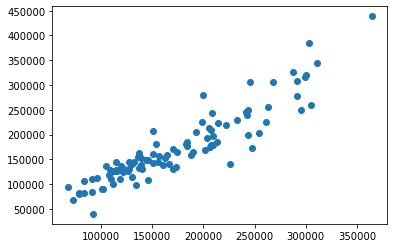

In [104]:
# Plot first Model (actual Y values vs predicted)
plt.scatter(predictions,y)

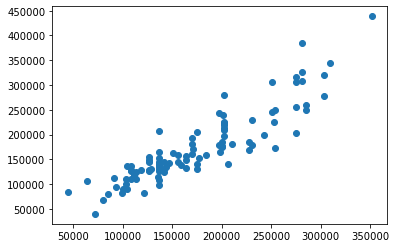

In [105]:
# Plot second model (actual Y values vs predicted)
plt.scatter(predictions1,y)

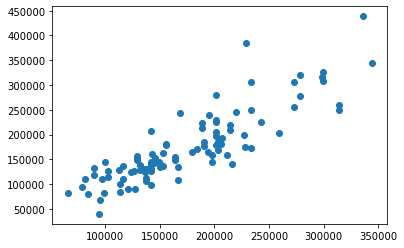

In [106]:
# Plot third model (actual Y values vs predicted)
plt.scatter(predictions2,y)

[Back To Top](#Index)

### 3.4 Verify againts test data <a class="anchor" id="Verify-against-test-data"><a/> 

In [107]:
testData = pd.read_csv('jtest.csv')
testData

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,195,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
96,196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872
97,197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
98,198,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000


In [110]:
# Clean this data so that the non-numeric data types are switched to numeric
test = testData[['SalePrice','OverallQual','OverallCond','BldgType','Neighborhood','TotRmsAbvGrd','GrLivArea','FullBath','KitchenQual']].sort_values('SalePrice')
test.loc[test['BldgType'] == '1Fam', 'BldgType'] = 1
test.loc[test['BldgType'] == 'Duplex', 'BldgType'] = 2
test.loc[test['BldgType'] == 'Twnhs', 'BldgType'] = 3
test.loc[test['BldgType'] == '2fmCon', 'BldgType'] = 4
test.loc[test['BldgType'] == 'TwnhsE', 'BldgType'] = 5

test['BldgType'] = np.int64(test['BldgType'])

test.loc[test['KitchenQual'] == 'Po', 'KitchenQual'] = 0
test.loc[test['KitchenQual'] == 'TA', 'KitchenQual'] = 1
test.loc[test['KitchenQual'] == 'Fa', 'KitchenQual'] = 2
test.loc[test['KitchenQual'] == 'Gd', 'KitchenQual'] = 3
test.loc[test['KitchenQual'] == 'Ex', 'KitchenQual'] = 4

trainDF['KitchenQual'] = np.int64(trainDF['KitchenQual'])


test.loc[test['Neighborhood'] == 'Edwards', 'Neighborhood'] = 1
test.loc[test['Neighborhood'] == 'NPkVill', 'Neighborhood'] = 2
test.loc[test['Neighborhood'] == 'IDOTRR', 'Neighborhood'] = 3
test.loc[test['Neighborhood'] == 'BrkSide', 'Neighborhood'] = 4
test.loc[test['Neighborhood'] == 'OldTown', 'Neighborhood'] = 5
test.loc[test['Neighborhood'] == 'Edwards', 'Neighborhood'] = 6
test.loc[test['Neighborhood'] == 'Sawyer', 'Neighborhood'] = 7
test.loc[test['Neighborhood'] == 'MeadowV', 'Neighborhood'] = 8
test.loc[test['Neighborhood'] == 'NAmes', 'Neighborhood'] = 9
test.loc[test['Neighborhood'] == 'CollgCr', 'Neighborhood'] = 10
test.loc[test['Neighborhood'] == 'Mitchel', 'Neighborhood'] = 11
test.loc[test['Neighborhood'] == 'Crawfor', 'Neighborhood'] = 12
test.loc[test['Neighborhood'] == 'SawyerW', 'Neighborhood'] = 13
test.loc[test['Neighborhood'] == 'Somerst', 'Neighborhood'] = 14
test.loc[test['Neighborhood'] == 'Gilbert', 'Neighborhood'] = 15
test.loc[test['Neighborhood'] == 'Timber', 'Neighborhood'] = 16
test.loc[test['Neighborhood'] == 'Veenker', 'Neighborhood'] = 17
test.loc[test['Neighborhood'] == 'NWAmes', 'Neighborhood'] = 18
test.loc[test['Neighborhood'] == 'NridgHt', 'Neighborhood'] = 19
test.loc[test['Neighborhood'] == 'ClearCr', 'Neighborhood'] = 20
test.loc[test['Neighborhood'] == 'NoRidge', 'Neighborhood'] = 21
test.loc[test['Neighborhood'] == 'StoneBr', 'Neighborhood'] = 22
test.loc[test['Neighborhood'] == 'Blmngtn', 'Neighborhood'] = 23
test.loc[test['Neighborhood'] == 'Blueste', 'Neighborhood'] = 24
test.loc[test['Neighborhood'] == 'BrDale', 'Neighborhood'] = 25

test['Neighborhood'] = np.int64(test['Neighborhood'])

test

,SalePrice,OverallQual,OverallCond,BldgType,Neighborhood,TotRmsAbvGrd,GrLivArea,FullBath,KitchenQual
55,79000,6,5,1,1,5,1096,1,1
25,84500,6,8,4,3,5,754,1,1
27,87000,5,7,1,5,5,840,1,1
79,100000,5,6,1,5,5,968,1,1
6,100000,4,7,1,5,6,1047,1,1
...,...,...,...,...,...,...,...,...,...
51,372402,8,5,1,19,6,1710,2,3
12,383970,7,5,1,10,10,2696,2,4
61,412500,9,5,1,19,10,2668,2,4
85,475000,10,9,1,5,12,3608,2,4


In [114]:
X = test[['Neighborhood','OverallQual','GrLivArea','KitchenQual','FullBath','TotRmsAbvGrd']]
Y = test['SalePrice']
Predictions = model.predict(X)
model.score(X,Y)

0.7614551786946563

(array([ 4.,  7., 47., 23.,  9.,  4.,  2.,  1.,  2.,  1.]),
 array([-75106.62753625, -50435.37779722, -25764.12805819,  -1092.87831917,
         23578.37141986,  48249.62115889,  72920.87089792,  97592.12063695,
        122263.37037598, 146934.62011501, 171605.86985404]),
 <BarContainer object of 10 artists>)

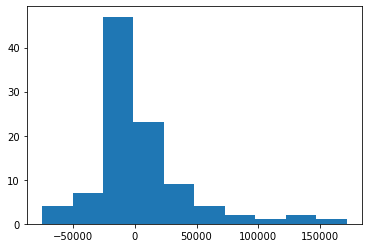

In [115]:
plt.hist(Y-Predictions)

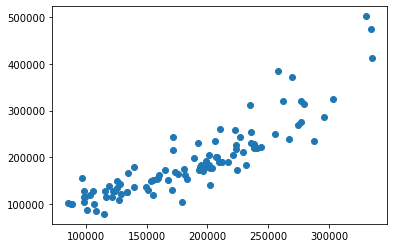

In [116]:
plt.scatter(Predictions, Y)

[Back To Top](#Index)

# Conclusion <a class="anchor" id="Conclusion"><a/> 

To conclude this analysis, I found the variables that worked the best to predict each house sale price are: Neighborhood, OverallQual, GrLivArea, KitchenQual, FullBath, TotRmsAbvGrd. Not only do they product the highest R score in relation to house sale price data, but they also show us a tighter spread when we plot the predicted dependent variables against the actual variables. By executing this project myself, I learned how important it is to clean data and ensure data types are what you expect them to be, specially if you plan on doing some sort of predictive model with the data in the future.

[Back To Top](#Index)

# References <a class="anchor" id="References"><a/> 

Hunter, John. "matplotlib.org." matplotlib. matplotlib development team. 2012-2023. https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html

[Back To Top](#Index)